In [41]:
import h5py
from qs_mps.mps_class import MPS
from qs_mps.utils import tensor_shapes
import time
import os

In [33]:
l = 6
L = 10
model = "Z2_dual"
d = 2**l
chi = 128
h = 0.1
precision = 1
cx = None
cy = None
bc = "obc"
lattice = MPS(L=L,d=d,model=model,chi=chi,h=h)
lattice._random_state(seed=3, type_shape="rectangular")
lattice.canonical_form()
lattice.DMRG(trunc_chi=True, trunc_tol=False)
tensor_shapes(lattice.sites)
sector = lattice.Z2.sector
print(sector)

Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 2
total iterations 19
total time: 995.2448454999831
##############################
(1, 64, 64)
(64, 64, 128)
(128, 64, 128)
(128, 64, 128)
(128, 64, 128)
(128, 64, 128)
(128, 64, 128)
(128, 64, 128)
(128, 64, 64)
(64, 64, 1)
vacuum_sector


In [38]:
# Prepare the data dictionary with only HDF5-compatible native types
metadata = dict(model=model, bc=bc, l=l, L=L, chi=chi, h=h, sector=sector)

path = "pc"
if path == "pc":
    parent_path = f"C:/Users/HP/Desktop/projects/1_Z2"
    # parent_path = "G:/My Drive/projects/1_Z2"
    path_tensor = "D:/code/projects/1_Z2"
elif path == "mac":
    # parent_path = "/Users/fradm98/Google Drive/My Drive/projects/1_Z2"
    path_tensor = "/Users/fradm98/Desktop/projects/1_Z2"
    parent_path = path_tensor
elif path == "marcos":
    # parent_path = "/Users/fradm/Google Drive/My Drive/projects/1_Z2"
    path_tensor = "/Users/fradm/Desktop/projects/1_Z2"
    parent_path = path_tensor

filename = f"/results/tensors/tensor_sites_{model}_direct_lattice_{l}x{L}_bc_{bc}_{sector}_{cx}-{cy}_chi_{chi}_h_{h:.{precision}f}"


# Start timing
start_time = time.time()

with h5py.File(f"{parent_path}{filename}.h5", "w") as f:
    # Save scalar metadata as file attributes
    for key, value in metadata.items():
        f.attrs[key] = value  # This is good for small, scalar data like strings or numbers

    # Create a group for the tensors
    tensors_group = f.create_group("tensors")
    
    # Store each tensor as a separate dataset within the group
    for i, tensor in enumerate(lattice.sites):
        tensors_group.create_dataset(f"tensor_{i}", data=tensor, compression="gzip")

# End timing
end_time = time.time()
print(f"Data saved successfully to 'data.h5' in t: {end_time - start_time} seconds")

Data saved successfully to 'data.h5' in t: 2.5590686798095703 seconds


In [24]:
with h5py.File(f"{parent_path}{filename}.h5", "r") as f:
    # Load metadata
    metadata = {key: f.attrs[key] for key in f.attrs}
    print("Metadata:", metadata)
    
    # Load tensors
    tensors = [f["tensors"][f"tensor_{i}"][:] for i in range(L)]
    print("Loaded tensors:", tensors)


Metadata: {'L': 5, 'bc': 'obc', 'chi': 16, 'h': 0.1, 'l': 3, 'model': 'Z2_dual', 'sector': 'vacuum_sector'}
Loaded tensors: [array([[[ 3.64323371e-01+0.j,  1.54477237e-03+0.j, -1.69902998e-16+0.j,
          2.58827228e-04+0.j, -3.78501896e-06+0.j, -1.37653176e-19+0.j,
          6.24808448e-07+0.j, -5.35426214e-09+0.j],
        [ 3.55270037e-01+0.j,  6.12660649e-04+0.j, -1.25575802e-03+0.j,
         -6.30085374e-04+0.j,  1.63337217e-06+0.j,  3.10758404e-06+0.j,
          1.50637930e-06+0.j,  5.49044760e-09+0.j],
        [ 3.57036886e-01+0.j,  2.32965583e-04+0.j, -8.80194741e-17+0.j,
          1.49719957e-03+0.j,  7.32382062e-07+0.j,  2.60278181e-19+0.j,
         -3.69066319e-06+0.j,  5.46278438e-09+0.j],
        [ 3.51663383e-01+0.j, -6.55311924e-04+0.j, -1.24309472e-03+0.j,
          6.01141557e-04+0.j,  1.52742703e-06+0.j, -3.13924075e-06+0.j,
          1.57807486e-06+0.j, -5.54599793e-09+0.j],
        [ 3.55270037e-01+0.j,  6.12660649e-04+0.j,  1.25575802e-03+0.j,
         -6.3008537

In [43]:
Ls = [4,5,6,7,8,9,10]
l = 6
model = "Z2_dual"
d = 2**l
chi = 128
h = 0.1
precision = 1
cx = None
cy = None
bc = "obc"
times = []
memory = []
for L in Ls:
    lattice = MPS(L=L,d=d,model=model,chi=chi,h=h)
    lattice._random_state(seed=3, type_shape="rectangular")
    lattice.canonical_form()
    lattice.DMRG(trunc_chi=True, trunc_tol=False)
    tensor_shapes(lattice.sites)
    sector = lattice.Z2.sector

    filename = f"/results/tensors/tensor_sites_{model}_direct_lattice_{l}x{L}_bc_{bc}_{sector}_{cx}-{cy}_chi_{chi}_h_{h:.{precision}f}"


    # Start timing
    start_time = time.time()

    with h5py.File(f"{parent_path}{filename}.h5", "w") as f:
        # Save scalar metadata as file attributes
        for key, value in metadata.items():
            f.attrs[key] = value  # This is good for small, scalar data like strings or numbers

        # Create a group for the tensors
        tensors_group = f.create_group("tensors")
        
        # Store each tensor as a separate dataset within the group
        for i, tensor in enumerate(lattice.sites):
            tensors_group.create_dataset(f"tensor_{i}", data=tensor, compression="gzip")

        
    # End timing
    end_time = time.time()
    times.append(end_time - start_time)
    print(f"Data saved successfully in t: {end_time - start_time} seconds for lxL: {l}x{L}")
    # Get the file size in GB
    file_size_bytes = os.path.getsize(f"{parent_path}{filename}.h5")
    file_size_gb = file_size_bytes / (1024 ** 3)
    print(f"File size: {file_size_gb:.4f} GB\n\n")
    memory.append(file_size_gb)
print(times)
print(memory)

Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 2
total iterations 7
total time: 156.48772300011478
##############################
(1, 64, 64)
(64, 64, 128)
(128, 64, 64)
(64, 64, 1)
Data saved successfully in t: 0.49057483673095703 seconds for lxL: 6x4
File size: 0.0084 GB


Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 2
total iterations 9
total time: 313.3328239999246
##############################
(1, 64, 64)
(64, 64, 128)
(128, 64, 128)
(128, 64, 64)
(64, 64, 1)
Data saved successfully in t: 0.8632268905639648 seconds for lxL: 6x5
File size: 0.0166 GB


Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-10 after:
1 sweeps at site 2
total iterations 11
total time: 456.8461049001198
######

The time for 10GB could be around: 458.59479798900037 seconds


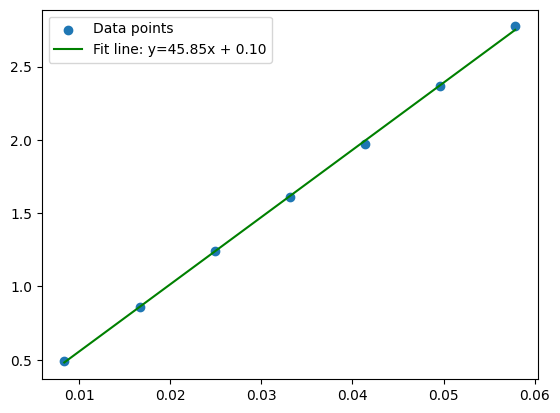

In [49]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
coeff = np.polyfit(memory, times, deg=1)
slope, intercept = coeff

y_pred = np.polyval(coeff, memory)
plt.scatter(memory, times, label="Data points")
plt.plot(memory, y_pred, color="green", label=f"Fit line: y={slope:.2f}x + {intercept:.2f}")
plt.legend()
y_gb = np.polyval(coeff, 10)

print(f"The time for 10GB could be around: {y_gb} seconds")

In [55]:
import datetime as dt

t_fin = dt.timedelta(seconds=700000)
print(f"final time: {t_fin}")

final time: 8 days, 2:26:40
